In [93]:
import numpy as np

class Perceptron(object):
    """パーセプトロンの分類器

    パラメータ
    ------------
    eta: float
      学習率(0.0より大きく1.0以下の値)
    n_iter: int
      訓練回数
    random_state: int
      シャッフル用の乱数生成器のシード

    属性
    ----------
    w_: 1次元配列
      重みベクトル
    errors_: リスト
      各エポックでの誤分類数
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        訓練データに適合させる

        パラメータ
        ----------
        X: {配列のようなデータ構造}, shape = [n_samples, n_features]
          訓練データ
        y: 配列のようなデータ構造, shape = [n_samples]
          目的変数

        戻り値
        -------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



In [94]:
import os

import pandas as pd

s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')

print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


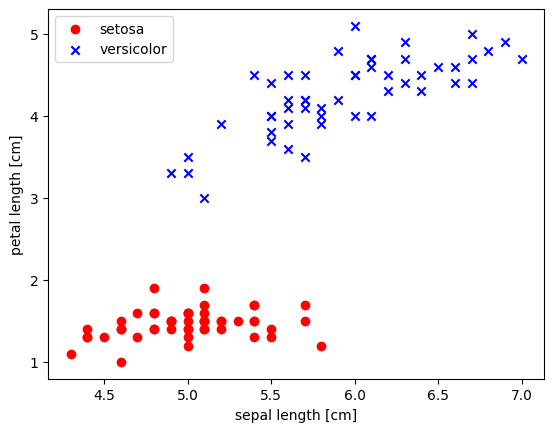

In [97]:
import matplotlib.pyplot as plt

import numpy as np

#1-100行目の目的変数の抽出

y = df.iloc[0:100, 4].values

# Iris-setosaを-1, Iris-versicolorを１に変換

y = np.where(y == 'Iris-setosa', -1, 1)

#1-100行目の目的変数の1,3列目の抽出

X = df.iloc[0:100, [0, 2]].values

# 品種setosaのプロット　

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')

plt.scatter(X[50: 100,0], X[50:100,1], color='blue', marker='x', label='versicolor')

# 軸のラベルの設定

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')



# 凡例の設定　（左上に配置）

plt.legend(loc='upper left')

# 図の表示

plt.show()

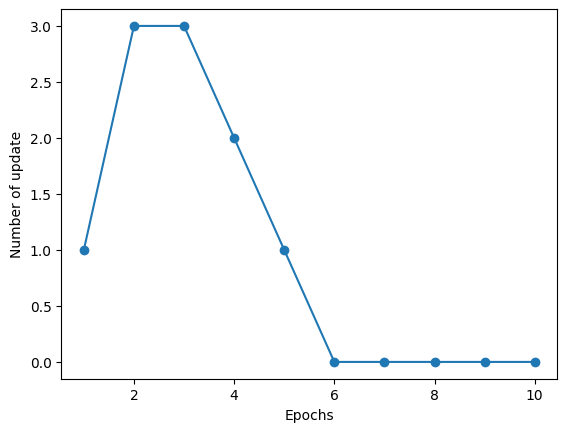

In [103]:
# パーセプトロンのオブジェクトの生成
ppn = Perceptron(eta=0.1, n_iter=10)
# 訓練データへのモデルの適合
ppn.fit(X, y)
#　エポックとご分類の関係を表す折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of update')
plt.show()

In [107]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # マーカーとカラーマップの準備
    markers = ('s', 'x', '○', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # 各特長量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    #　軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/tmp/ipykernel_2415/2897618597.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


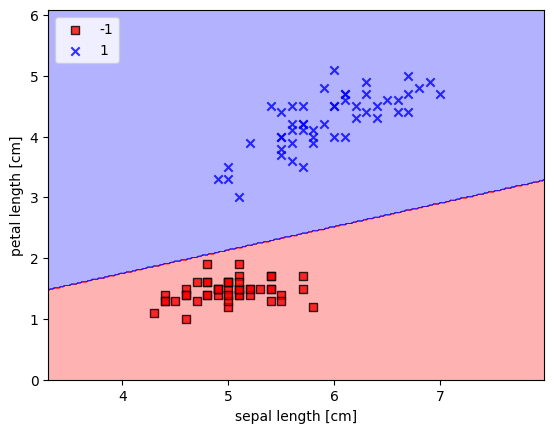

In [108]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
#　凡例の設定
plt.legend(loc='upper left')
#　図の表示
plt.show()